In [ ]:

## Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##PVG98
#Importing the Tensorflow and keras for timeseries RNN
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense , SimpleRNN

In [ ]:
##PVG98
#Importing  keras for timegenerator and min max scaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import  MinMaxScaler

 ## Generating Data

In [ ]:
##PVG98
#Creating Simple sine wave using numpy
x = np.linspace(0,50,768)
y = np.sin(x)

In [ ]:
##PVG98
x

array([ 0.        ,  0.06518905,  0.1303781 ,  0.19556714,  0.26075619,
        0.32594524,  0.39113429,  0.45632334,  0.52151239,  0.58670143,
        0.65189048,  0.71707953,  0.78226858,  0.84745763,  0.91264668,
        0.97783572,  1.04302477,  1.10821382,  1.17340287,  1.23859192,
        1.30378096,  1.36897001,  1.43415906,  1.49934811,  1.56453716,
        1.62972621,  1.69491525,  1.7601043 ,  1.82529335,  1.8904824 ,
        1.95567145,  2.0208605 ,  2.08604954,  2.15123859,  2.21642764,
        2.28161669,  2.34680574,  2.41199478,  2.47718383,  2.54237288,
        2.60756193,  2.67275098,  2.73794003,  2.80312907,  2.86831812,
        2.93350717,  2.99869622,  3.06388527,  3.12907432,  3.19426336,
        3.25945241,  3.32464146,  3.38983051,  3.45501956,  3.5202086 ,
        3.58539765,  3.6505867 ,  3.71577575,  3.7809648 ,  3.84615385,
        3.91134289,  3.97653194,  4.04172099,  4.10691004,  4.17209909,
        4.23728814,  4.30247718,  4.36766623,  4.43285528,  4.49

In [ ]:
##PVG98
y

array([ 0.        ,  0.06514289,  0.13000904,  0.1943229 ,  0.25781126,
        0.3202044 ,  0.38123728,  0.44065063,  0.49819205,  0.55361709,
        0.60669031,  0.65718624,  0.70489037,  0.74960006,  0.79112536,
        0.82928988,  0.86393148,  0.89490301,  0.9220729 ,  0.94532572,
        0.9645627 ,  0.97970211,  0.99067964,  0.99744866,  0.99998041,
        0.99826414,  0.99230713,  0.98213469,  0.96779005,  0.94933412,
        0.92684533,  0.90041919,  0.87016798,  0.8362202 ,  0.79872006,
        0.75782688,  0.71371437,  0.66656992,  0.61659382,  0.56399835,
        0.50900696,  0.45185326,  0.39278003,  0.33203823,  0.2698859 ,
        0.20658706,  0.14241062,  0.0776292 ,  0.01251801, -0.05264636,
       -0.11758708, -0.18202829, -0.24569621, -0.30832039, -0.3696348 ,
       -0.42937895, -0.48729906, -0.54314907, -0.59669172, -0.64769957,
       -0.69595591, -0.74125576, -0.78340668, -0.8222296 , -0.8575596 ,
       -0.8892466 , -0.91715598, -0.94116918, -0.9611842 , -0.97

### Plotting the sine wave to visualize the periodic pattern created by the sine function.



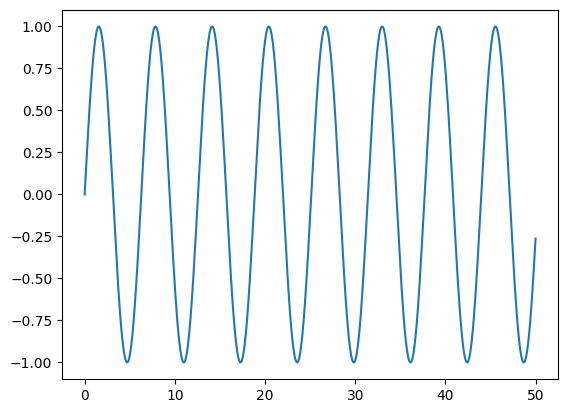

In [ ]:
##PVG98
plt.plot(x,y)

In [ ]:
##PVG98
#Loading data into dataframe index as x , data as y
df=pd.DataFrame(data=y, index=x, columns=['sine'])

In [ ]:
##PVG98
df.head(5)

,sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811


In [ ]:
##PVG98
len(df)

768

## Split data (Train and Test)

In [ ]:
##PVG98
#Testing the data percentage at 20%
test_percent=0.2

In [ ]:

##PVG98
#Number of data points reserved for testing the model
len(df)*test_percent

153.60000000000002

In [ ]:
##PVG98
#re writing the code to find the test data length
test_length = np.round(len(df)*test_percent)

In [ ]:
##PVG98
test_length

154.0

In [ ]:
##PVG98
#the test data starts at this index
test_start_index = int(len(df)- test_length)

In [ ]:
##PVG98
test_start_index

614

In [ ]:
##PVG98
#Create separate training and testing datasets
#Training data includes start to test_start_index
data_train = df.iloc[: test_start_index]
#Testing data starts from test_start_index to end of the dataframe
data_test = df.iloc[test_start_index :]

In [ ]:

##PVG98
data_train.head(5)

,sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811


In [ ]:
##PVG98
data_test.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


<h1>Normalization of Data</h1>

In [ ]:
##PVG98
#create a minmax scaler to normalize the data
scaler = MinMaxScaler()

In [ ]:
##PVG98
#train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [ ]:
##PVG98
#normalize both the training and testing dataset
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

## Create a time series generator instance

In [ ]:
##PVG98
#Setting length of input sequence ,batch size and creating a time series generator for training set
length = 50
batch_size = 1
train_tsGenerator50 =TimeseriesGenerator(normalized_train,normalized_train, length=length, batch_size=batch_size)

In [ ]:
##PVG98
#Checking the Batch
x,y=train_tsGenerator50[0]

In [ ]:
##PVG98
#To get flatten array
x.flatten()

array([0.49999847, 0.53257003, 0.56500322, 0.59716027, 0.62890456,
       0.66010125, 0.6906178 , 0.72032458, 0.74909539, 0.77680802,
       0.80334472, 0.82859278, 0.85244493, 0.87479986, 0.89556258,
       0.91464491, 0.93196578, 0.9474516 , 0.96103659, 0.97266304,
       0.98228157, 0.9898513 , 0.99534009, 0.99872461, 0.99999049,
       0.99913235, 0.99615383, 0.9910676 , 0.98389525, 0.97466725,
       0.96342281, 0.9502097 , 0.93508404, 0.91811008, 0.89935995,
       0.87891328, 0.85685695, 0.83328464, 0.80829649, 0.78199867,
       0.75450287, 0.72592592, 0.69638919, 0.66601818, 0.63494191,
       0.60329237, 0.57120403, 0.53881321, 0.50625749, 0.47367519])

In [ ]:
##PVG98
# predicts the next value
y

array([[0.44120471]])

<h1> Build ,  Train and Test Model</h1>


<h2> Building SimpleRNN Model</h2>

<h3>PART IV: Simple RNN with Sine Wave Data and Keras</h3>

In [ ]:
##PVG98
# we write this command to check howmany features have been used in the traning model

n_features = 1
model = Sequential()
#Adding 2 layers simple RNN and dense layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(length, n_features)))

# Adding a second SimpleRNN layer with 64 neurons
model.add(SimpleRNN(64))

# Adding a fully connected (Dense) layer for the final prediction
# Output: predicting the next data point of the input sequence (only one value)
model.add(Dense(1))

<h1>Compile Model</h2>

In [ ]:
##PVG98
#compile the model and use optimizer Adam and Loss MSE , here we use MSE because the data is continuos : aregression problem
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

<h1> Train (Fit) Model</h1>

In [ ]:
##PVG98
#fit the model by using the below command
model.fit(train_tsGenerator50,epochs=5)

Epoch 1/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - loss: 0.0343
Epoch 2/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - loss: 4.3912e-04
Epoch 3/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 5.0574e-04
Epoch 4/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 2.2739e-04
Epoch 5/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 6.9845e-04


<h1>Visualize Model's Performance after Training</h1>

<Axes: >

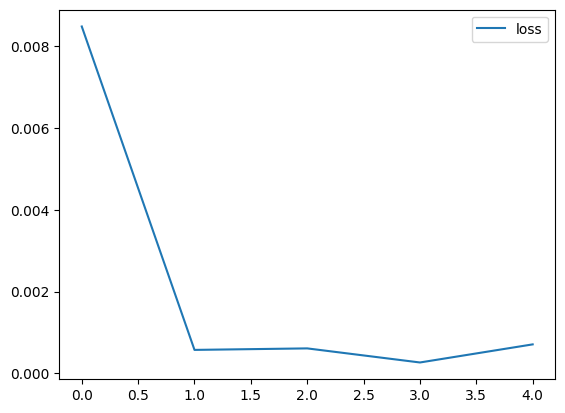

In [ ]:
##PVG98
#load the loss data into a dataframe and visulaize the dataframe

df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

<h1>Evaluate Model on Test Data</h1>


In [ ]:
##PVG98
#number of time steps of the input time series
length

50

In [ ]:
##PVG98
#1st series  batch
first_eval_batch =normalized_train[-length :]
first_eval_batch

array([[0.09844438],
       [0.11870465],
       [0.1405847 ],
       [0.16399157],
       [0.18882584],
       [0.21498201],
       [0.24234895],
       [0.27081042],
       [0.3002455 ],
       [0.33052916],
       [0.36153273],
       [0.39312453],
       [0.42517034],
       [0.45753402],
       [0.4900781 ],
       [0.52266432],
       [0.55515426],
       [0.58740988],
       [0.61929418],
       [0.65067169],
       [0.68140913],
       [0.71137591],
       [0.74044474],
       [0.76849213],
       [0.79539893],
       [0.82105084],
       [0.84533888],
       [0.86815988],
       [0.88941689],
       [0.9090196 ],
       [0.92688476],
       [0.94293645],
       [0.9571065 ],
       [0.9693347 ],
       [0.97956911],
       [0.98776625],
       [0.9938913 ],
       [0.99791825],
       [0.99982998],
       [0.99961836],
       [0.99728431],
       [0.99283774],
       [0.98629753],
       [0.97769147],
       [0.96705613],
       [0.95443667],
       [0.9398867 ],
       [0.923

In [ ]:
##PVG98
#reshape the batch it is necessary to be in 3d
first_eval_batch = first_eval_batch.reshape((1 , length , n_features))
first_eval_batch

array([[[0.09844438],
        [0.11870465],
        [0.1405847 ],
        [0.16399157],
        [0.18882584],
        [0.21498201],
        [0.24234895],
        [0.27081042],
        [0.3002455 ],
        [0.33052916],
        [0.36153273],
        [0.39312453],
        [0.42517034],
        [0.45753402],
        [0.4900781 ],
        [0.52266432],
        [0.55515426],
        [0.58740988],
        [0.61929418],
        [0.65067169],
        [0.68140913],
        [0.71137591],
        [0.74044474],
        [0.76849213],
        [0.79539893],
        [0.82105084],
        [0.84533888],
        [0.86815988],
        [0.88941689],
        [0.9090196 ],
        [0.92688476],
        [0.94293645],
        [0.9571065 ],
        [0.9693347 ],
        [0.97956911],
        [0.98776625],
        [0.9938913 ],
        [0.99791825],
        [0.99982998],
        [0.99961836],
        [0.99728431],
        [0.99283774],
        [0.98629753],
        [0.97769147],
        [0.96705613],
        [0

In [ ]:
##PVG98
#now check the shape
first_eval_batch.shape

(1, 50, 1)

<h1>Evaluate Model</h1>

In [ ]:
##PVG98
# the full code is for evaluation, at first create a empty set to store all predicitons
test_predictions = []
#this is last 50 datapoints of the train set
first_eval_batch= normalized_train[-length:]
#reshape the batch to 3d array
current_batch =first_eval_batch.reshape((1 ,length,n_features))
#run for loop to make a prediction and get the value and store the prediction
for i in range(len(data_test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
# generate a new batch to prepare for the next iteration of the testing and drop the first data of the current inputsequence
  current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [ ]:
##PVG98
#convert the scaled results back to the real values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.71325207],
       [ 0.65881975],
       [ 0.59671861],
       [ 0.529018  ],
       [ 0.45000899],
       [ 0.36960619],
       [ 0.27933469],
       [ 0.17962268],
       [ 0.06845315],
       [-0.0479711 ],
       [-0.17910097],
       [-0.32238763],
       [-0.47858425],
       [-0.64544959],
       [-0.83157681],
       [-1.03079676],
       [-1.24378907],
       [-1.46880811],
       [-1.70777037],
       [-1.94658087],
       [-2.1813378 ],
       [-2.40532564],
       [-2.61115606],
       [-2.78100377],
       [-2.91922119],
       [-3.02270151],
       [-3.09120917],
       [-3.11985124],
       [-3.12860356],
       [-3.11305014],
       [-3.07747846],
       [-3.02255393],
       [-2.96761474],
       [-2.89719759],
       [-2.81985107],
       [-2.73862573],
       [-2.66636204],
       [-2.58165866],
       [-2.50367199],
       [-2.43452859],
       [-2.37821361],
       [-2.31315764],
       [-2.27394449],
       [-2.25029464],
       [-2.24168943],
       [-2

In [ ]:
##PVG98
data_test

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985
...,...
49.739244,-0.502284
49.804433,-0.444888
49.869622,-0.385602
49.934811,-0.324678


In [ ]:
##PVG98
#copy the true values of prediction into the dataframe of original data set
data_test['Predictions'] = true_predictions

In [ ]:
##PVG98
#updated data test
data_test

,sine,Predictions
40.026076,0.727471,0.713252
40.091265,0.681229,0.658820
40.156454,0.632093,0.596719
40.221643,0.580271,0.529018
40.286832,0.525985,0.450009
...,...,...
49.739244,-0.502284,-1.733969
49.804433,-0.444888,-4.193882
49.869622,-0.385602,-2.038023
49.934811,-0.324678,-4.080795


<Axes: >

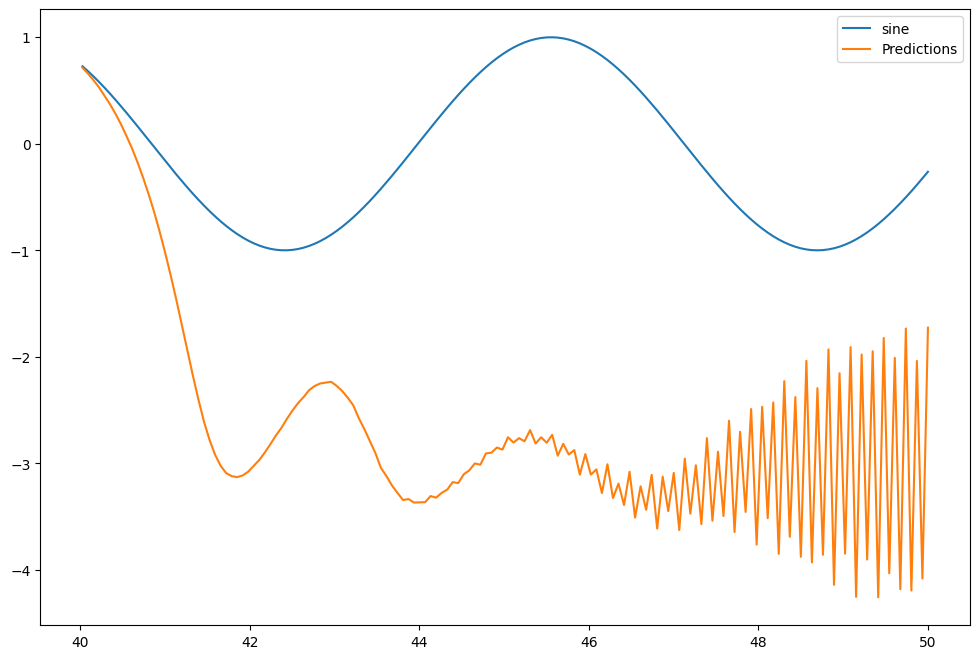

In [ ]:
##PVG98
#Visualizing the data of updated test data
#Comparing the predicted sine wave against the original sine wave
data_test.plot(figsize=(12,8))

<h1>PART V: Redesign Simple RNN</h1>

In [ ]:
##PVG98
# we write this command to check howmany features have been used in the traning model

n_features = 1
model = Sequential()
#Adding 2 layers simple RNN and dense layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(length, n_features)))

# Adding a second SimpleRNN layer with 64 neurons
model.add(SimpleRNN(85))

# Adding a fully connected (Dense) layer for the final prediction
# Output: predicting the next data point of the input sequence (only one value)
model.add(Dense(1))

In [ ]:
##PVG98
#compile the model and use optimizer Adam and Loss MSE , here we use MSE because the data is continuos : aregression problem
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 85)                  │          12,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              86 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,060 (66.64 KB)

 Trainable params: 17,060 (66.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#PVG98
#fit the model by using the below command
model.fit(train_tsGenerator50,epochs=5)

Epoch 1/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0351
Epoch 2/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0013
Epoch 3/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 3.9090e-04
Epoch 4/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 2.7068e-04
Epoch 5/5
564/564 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 4.7524e-04


<Axes: >

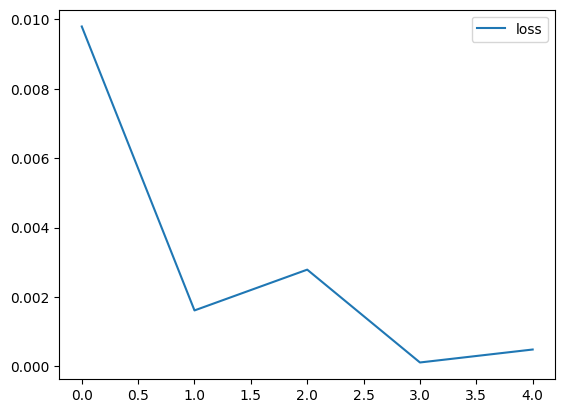

In [ ]:
##PVG98
#load the loss data into a dataframe and visulaize the dataframe

df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

In [ ]:
##PVG98
#number of time steps of the input time series
length

50

In [ ]:
##PVG98
#1st series  batch
first_eval_batch =normalized_train[-length :]
first_eval_batch

array([[0.09844438],
       [0.11870465],
       [0.1405847 ],
       [0.16399157],
       [0.18882584],
       [0.21498201],
       [0.24234895],
       [0.27081042],
       [0.3002455 ],
       [0.33052916],
       [0.36153273],
       [0.39312453],
       [0.42517034],
       [0.45753402],
       [0.4900781 ],
       [0.52266432],
       [0.55515426],
       [0.58740988],
       [0.61929418],
       [0.65067169],
       [0.68140913],
       [0.71137591],
       [0.74044474],
       [0.76849213],
       [0.79539893],
       [0.82105084],
       [0.84533888],
       [0.86815988],
       [0.88941689],
       [0.9090196 ],
       [0.92688476],
       [0.94293645],
       [0.9571065 ],
       [0.9693347 ],
       [0.97956911],
       [0.98776625],
       [0.9938913 ],
       [0.99791825],
       [0.99982998],
       [0.99961836],
       [0.99728431],
       [0.99283774],
       [0.98629753],
       [0.97769147],
       [0.96705613],
       [0.95443667],
       [0.9398867 ],
       [0.923

In [ ]:
##PVG98
#reshape the batch it is necessary to be in 3d
first_eval_batch = first_eval_batch.reshape((1 , length , n_features))
first_eval_batch

array([[[0.09844438],
        [0.11870465],
        [0.1405847 ],
        [0.16399157],
        [0.18882584],
        [0.21498201],
        [0.24234895],
        [0.27081042],
        [0.3002455 ],
        [0.33052916],
        [0.36153273],
        [0.39312453],
        [0.42517034],
        [0.45753402],
        [0.4900781 ],
        [0.52266432],
        [0.55515426],
        [0.58740988],
        [0.61929418],
        [0.65067169],
        [0.68140913],
        [0.71137591],
        [0.74044474],
        [0.76849213],
        [0.79539893],
        [0.82105084],
        [0.84533888],
        [0.86815988],
        [0.88941689],
        [0.9090196 ],
        [0.92688476],
        [0.94293645],
        [0.9571065 ],
        [0.9693347 ],
        [0.97956911],
        [0.98776625],
        [0.9938913 ],
        [0.99791825],
        [0.99982998],
        [0.99961836],
        [0.99728431],
        [0.99283774],
        [0.98629753],
        [0.97769147],
        [0.96705613],
        [0

In [ ]:
##PVG98
#now check the shape
first_eval_batch.shape

(1, 50, 1)

In [ ]:
##PVG98
# the full code is for evaluation, at first create a empty set to store all predicitons
test_predictions = []
#this is last 50 datapoints of the train set
first_eval_batch= normalized_train[-length:]
#reshape the batch to 3d array
current_batch =first_eval_batch.reshape((1 ,length,n_features))
#run for loop to make a prediction and get the value and store the prediction
for i in range(len(data_test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
# generate a new batch to prepare for the next iteration of the testing and drop the first data of the current inputsequence
  current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

In [ ]:
##PVG98
#convert the scaled results back to the real values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.71850679],
       [ 0.6678087 ],
       [ 0.61113478],
       [ 0.55027127],
       [ 0.48442649],
       [ 0.41569079],
       [ 0.34337548],
       [ 0.2681287 ],
       [ 0.18980324],
       [ 0.10908716],
       [ 0.025882  ],
       [-0.05827069],
       [-0.14454768],
       [-0.23002025],
       [-0.31529696],
       [-0.39963699],
       [-0.48200632],
       [-0.56093552],
       [-0.63621868],
       [-0.70683795],
       [-0.77171234],
       [-0.82944138],
       [-0.88069815],
       [-0.92284097],
       [-0.95656858],
       [-0.98044878],
       [-0.99389024],
       [-0.99579072],
       [-0.98584482],
       [-0.96282319],
       [-0.92570822],
       [-0.87399488],
       [-0.8062625 ],
       [-0.72101513],
       [-0.61861308],
       [-0.49804456],
       [-0.35867778],
       [-0.20195724],
       [-0.0293654 ],
       [ 0.1558572 ],
       [ 0.34969021],
       [ 0.54539741],
       [ 0.73703292],
       [ 0.9161037 ],
       [ 1.07542979],
       [ 1

In [ ]:
##PVG98
data_test

,sine,Predictions
40.026076,0.727471,0.713252
40.091265,0.681229,0.658820
40.156454,0.632093,0.596719
40.221643,0.580271,0.529018
40.286832,0.525985,0.450009
...,...,...
49.739244,-0.502284,-1.733969
49.804433,-0.444888,-4.193882
49.869622,-0.385602,-2.038023
49.934811,-0.324678,-4.080795


In [ ]:
##PVG98
#copy the true values of prediction into the dataframe of original data set
data_test['Predictions'] = true_predictions

In [ ]:
##PVG98
#updated data test
data_test

,sine,Predictions
40.026076,0.727471,0.718507
40.091265,0.681229,0.667809
40.156454,0.632093,0.611135
40.221643,0.580271,0.550271
40.286832,0.525985,0.484426
...,...,...
49.739244,-0.502284,-4.510249
49.804433,-0.444888,-4.510204
49.869622,-0.385602,-4.510174
49.934811,-0.324678,-4.510160


<Axes: >

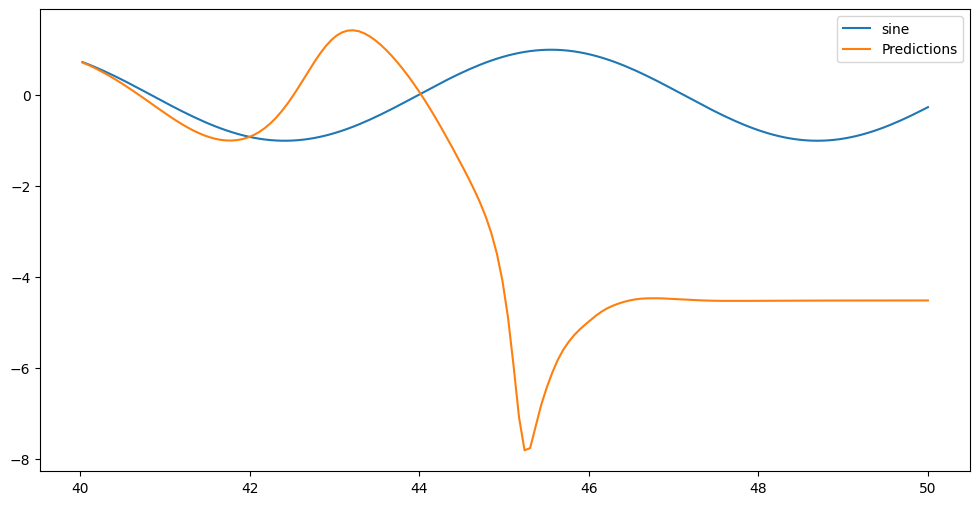

In [ ]:
##PVG98
#Visualizing the data of updated test data
#Comparing the predicted sine wave against the original sine wave
data_test.plot(figsize=(12,6))